# COMP 3314  Assignment 1
<br><br>
Nian Xiaodong (3035087112)

# Python + ipynb

The goal of this assignment is to learn/review python and ipynb.
Python is a popular programming language, and also interfaced for several machine learning libraries, such as scikit-learn, Theano, and TensorFlow.
Ipynb is a digital notebook format that allows flexible incorporation of a variety of information, such as code (e.g. python), data, text (e.g. markdown, html, and Latex), images (common raster/vector graphics formats such as jpg and svg), and video (e.g. youtube).
We can also run code and experiments directly inside ipynbs.
Thus, we will use ipynb for all assignments in this class.

# Sorting 

As a starting exercise, let's try to implement a sorting function via python.
The input to the function is a python array consisting of an arbitrary sequence of numbers.
The output is a sorted sequence with numbers ranging from small to large.
The code stub, along with the test driver, are shown below.

There are various algorithms for sorting with different time complexities with respect to the array size $N$, e.g. $O(N^2)$ for bubble sort and $O(Nlog(N))$ for quick sort.
You can choose any algorithm to implement, as long as it produces correct results with reasonable run-time.

Please submit a single ipynb file, consisting of python code in a code cell and descriptions (including algorithm and analysis of complexity) in a markdown cell.
You can use this ipynb as a start, or create your own.

## Code (20 points)

Please implement your algorithm via the function below.

In [3]:
# the function
def sort(values):
    # insert your code here
    for j in range(len(values)-1,0,-1):
        for i in range(0, j):
            if values[i] > values[i+1]:
                values[i], values[i+1] = values[i+1], values[i]
    return values

In [4]:
# main
import numpy as np

# different random seed
np.random.seed()

# generate numbers
N = 10
# the TA will vary the input array size and content during testing
values = np.random.random([N])

sort(values)

correct = True
for index in range(1, len(values)):
    if(values[index-1] > values[index]):
        correct = False
        
print('Correct? ' + str(correct))

Correct? True


# Line fitting
<img src="./images/01_04.png" width=50%>

Given a set of data points $\left(\mathbf{X}, \mathbf{Y}\right)$, fit a model curve to describe their relationship.

This is actually a regression problem, but we have all seen this in prior math/coding classes to serve as a good example for machine learning.

Recall $\mathbf{Y} = f(\mathbf{X}, \Theta)$ is our model.

For 2D linear curve fitting, the model is a straight line:
$y = w_1 x + w_0$, so the parameters $\Theta = \{w_0, w_1\}$.

The loss function is $L\left(\mathbf{X}, \mathbf{T}, \mathbf{Y}\right) = \sum_i \left( T^{(i)} - Y^{(i)}\right)^2 = \sum_i \left( T^{(i)} - w_1 X^{(i)} - w_0 \right)^2$.
<br>
($\mathbf{X}$ is a matrix/tensor, and each data sample is a row. We denote the ith sample/row as $\mathbf{X}^{(i)}$.)

For this simple example we don't care about regularization, thus $P(\Theta) = 0$.

The goal is to optimize $\Theta = \{w_0, w_1 \}$ with given $\left(\mathbf{X}, \mathbf{Y}\right)$ to minimize $L$.
For simple cases like this, we can directly optimize via calculus:
$$
\begin{align}
\frac{\partial L}{\partial w_0} & = 0 \\
\frac{\partial L}{\partial w_1} & = 0
\end{align}
$$


## Math (30 points)

Write down explicit formulas for $w_0$ and $w_1$ in terms of $\mathbf{X}$ and $\mathbf{T}$.

To minimize $L$, 
$$
\left\{\begin{matrix}
\frac{\partial L}{\partial w_0} = \frac{\partial}{\partial w_0}\left ( T^{(i)} - w_1 X^{(i)} - w_0 \right )^2 = 0\\ 
\frac{\partial L}{\partial w_1} = \frac{\partial}{\partial w_1}\left ( T^{(i)} - w_1 X^{(i)} - w_0 \right )^2 = 0
\end{matrix}\right.
$$


Thus, we get 
$$
\left\{\begin{matrix}
w_1 = \frac{(\sum_i 1)(\sum_i(X^{(i)}T^{(i)})-(\sum_i X^{(i)})(\sum_i T^{(i)})}{(\sum_i 1)(\sum_i (X^{(i)})^2)-(\sum_iX^{(i)})^2}\\ 
w_0 = \frac{\sum T^{(i)}-w_1(\sum X^{(i)})}{\sum_i 1}
\end{matrix}\right.
$$

## Code (50 points)

Implement your math above in the code below.

In [18]:
# line model
import numpy as np

class Line(object):
    def __init__(self, w0, w1):
        self.w0 = w0
        self.w1 = w1
        
    def predict(self, x, noise=0):
        return (x*self.w1 + self.w0 + noise*np.random.normal())

    # Input: data, a 2D array with each (x, t) pair on a row
    # Return: w0 and w1, the intercept and slope of the fitted line
    def learn(self, data):
        # math equations derived above
        N = len(data)
        sumX = sum(r[0] for r in data)
        sumT = sum(r[1] for r in data)
        sumX2 = sum(pow(r[0],2) for r in data)
        sumXT = sum((r[0]*r[1]) for r in data)
        
        w1 = (N*sumXT - sumX*sumT) / (N*sumX2 - pow(sumX, 2))
        w0 = (sumT - w1*sumX) / N
        
        return w0, w1

In [19]:
# test
np.random.seed()

w0 = np.asscalar(np.random.random(1))*2-1
w1 = np.asscalar(np.random.random(1))*2-1

line = Line(w0, w1)

N = 20
noise = 0.05
X = np.random.random([N])
T = []
for x in X:
    T.append(np.sum(line.predict(x, noise)))
T = np.array(T)    

#data = np.vstack((X, T)).transpose()
data = np.array([X, T]).transpose()

w0_fit, w1_fit = line.learn(data)

line_fit = Line(w0_fit, w1_fit)

print('truth:   ' + str(w0) + ' ' + str(w1))
print('predict: ' + str(w0_fit) + ' ' + str(w1_fit))

truth:   0.8188100241765226 0.7989884806053549
predict: 0.821700410562 0.792622149686


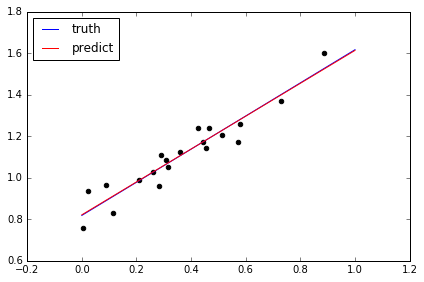

In [20]:
# plot
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], color='black', marker='o')

X_endpoints = [0, 1]
Y_truth, Y_fit = [], []
for x in X_endpoints:
    Y_truth.append(line.predict(x))
    Y_fit.append(line_fit.predict(x))
    
plt.plot(X_endpoints, Y_truth, color='blue', label='truth')
plt.plot(X_endpoints, Y_fit, color='red', label='predict')

plt.legend(loc='best')
plt.tight_layout()
plt.show()

<center><h1>- END -</h1></center>